Preface Data
Automatize to financial statement, need minimum intervence program to be finish is already 30%.
step to be fulfilled :
1.   Data Extraction
2.   Data Manipulation
3.   Data Interpreter
4.   Conclucion



#1. Crawling


##1a. Install Important Things

In [1]:
#install dependencies
!pip install yfinance
!pip install quandl
!pip install scipy
!pip install CurrencyConverter

In [2]:
import yfinance as yf
import quandl
import numpy as np
import pandas_datareader as pdr
import datetime
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from fbprophet import Prophet
from currency_converter import CurrencyConverter
from currency_converter import CurrencyConverter
cc = CurrencyConverter()
usdidr = cc.convert(1, 'USD', 'IDR')


##1b. Crawling from yfinance

In [3]:
stock = "KKGI.JK"
dy = yf.Ticker(stock)
#get stock info
info = dy.info
# get historical market data
hist = dy.history(period="max")
# show actions (dividends, splits)
act = dy.actions
# show dividends
div = dy.dividends
# show financials
fin = dy.financials
qfin = dy.quarterly_financials
# show major holders
psp = dy.major_holders
# show institutional holders
pspins = dy.institutional_holders
# show balance sheet
bc = dy.balance_sheet
qbc = dy.quarterly_balance_sheet
# show cashflow
cash = dy.cashflow
qcash = dy.quarterly_cashflow
# show earnings
instat = dy.earnings
qinstat = dy.quarterly_earnings
# show sustainability
sustain = dy.sustainability
# show analysts recommendations
reccom = dy.recommendations
# show next event (earnings, etc)
kalender = dy.calendar
# show news
berita = dy.news

##1c. Load Financial Statement w/ Crawler elements

In [4]:
#Load item fromFinancial Statement q = quarterly 
incomeq = qfin.transpose()
income = fin.transpose()
bcq = qbc.transpose()
bc1 = bc.transpose()
cfq = qcash.transpose()
cf = cash.transpose()
#contoh income statement

##Income Statement

In [5]:
incomeq.head()

,Research Development,Effect Of Accounting Charges,Income Before Tax,Minority Interest,Net Income,Selling General Administrative,Gross Profit,Ebit,Operating Income,Other Operating Expenses,Interest Expense,Extraordinary Items,Non Recurring,Other Items,Income Tax Expense,Total Revenue,Total Operating Expenses,Cost Of Revenue,Total Other Income Expense Net,Discontinued Operations,Net Income From Continuing Ops,Net Income Applicable To Common Shares
,,,,,,,,,,,,,,,,,,,,,,
2021-09-30,None,None,7825586.0,509296.0,5277423.0,1296314.0,8638542.0,7342228.0,7342228.0,NaN,-127127.0,None,None,None,2437670.0,32721713.0,25379485.0,24083171.0,483358.0,None,5387916.0,5277423.0
2021-06-30,None,None,2948718.0,398803.0,1990795.0,1780054.0,4741748.0,2961694.0,2961694.0,NaN,-106582.0,None,None,None,915566.0,27488086.0,24526392.0,22746338.0,-12976.0,None,2033152.0,1990795.0
2021-03-31,None,None,2559828.0,356446.0,1971004.0,1625463.0,4276269.0,2650806.0,2650806.0,NaN,-131452.0,None,None,None,778381.0,19935508.0,17284702.0,15659239.0,-90978.0,None,1781447.0,1971004.0
2020-12-31,None,None,-1212078.0,546003.0,190309.0,1265844.0,2336451.0,-1563654.0,-1563654.0,1726808.0,-175192.0,None,None,None,-686834.0,15089129.0,16652783.0,12752678.0,351576.0,None,-525244.0,190309.0


##Balance Sheet

In [6]:
bc1.head()

,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Minority Interest,Deferred Long Term Liab,Other Current Liab,Total Assets,Common Stock,Other Current Assets,Retained Earnings,Other Liab,Good Will,Treasury Stock,Other Assets,Cash,Total Current Liabilities,Deferred Long Term Asset Charges,Short Long Term Debt,Other Stockholder Equity,Property Plant Equipment,Total Current Assets,Long Term Investments,Net Tangible Assets,Net Receivables,Long Term Debt,Inventory,Accounts Payable
,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-31,790.0,578353.0,24437727.0,83704553.0,546003.0,1394506.0,3114482.0,108688283.0,24039183.0,13620102.0,108128009.0,9507509.0,1372508.0,-49040992.0,38087130.0,5261039.0,10844104.0,1997562.0,2073944.0,-38010731.0,35449838.0,33085205.0,692812.0,82331255.0,7874410.0,4086114.0,6329654.0,4697240.0
2019-12-31,2496.0,578353.0,32971463.0,91491930.0,1891144.0,3760510.0,4846322.0,126354537.0,24039183.0,13076808.0,116913370.0,9421952.0,1392650.0,-50038976.0,45276757.0,8629926.0,18033350.0,934998.0,1856285.0,-39008715.0,40475948.0,39197070.0,9616.0,90096784.0,8358826.0,5451327.0,9131510.0,9417905.0
2018-12-31,4020.0,578353.0,30558484.0,84685293.0,2021444.0,11008509.0,3235513.0,117265221.0,24039183.0,10987712.0,111296421.0,3962249.0,1336871.0,-51228664.0,42617255.0,3545158.0,19728859.0,626613.0,572546.0,-40198403.0,44013705.0,29163504.0,129866.0,83344402.0,3565900.0,6353233.0,11064734.0,13501460.0
2017-12-31,5608.0,578353.0,16433699.0,86410581.0,2209318.0,NaN,4334609.0,105053598.0,24039183.0,10831496.0,111106120.0,2650230.0,1428937.0,-49313075.0,24351159.0,18011061.0,11357496.0,515307.0,141995.0,-38293308.0,39051561.0,40211048.0,5285.0,84976036.0,5896047.0,2425973.0,5472444.0,6284173.0


##Cash Flow Statement

In [7]:
cf.head()

,Investments,Change To Liabilities,Total Cashflows From Investing Activities,Net Borrowings,Total Cash From Financing Activities,Net Income,Change In Cash,Effect Of Exchange Rate,Total Cash From Operating Activities,Depreciation,Other Cashflows From Investing Activities,Dividends Paid,Change To Netincome,Capital Expenditures,Repurchase Of Stock
,,,,,,,,,,,,,,,
2020-12-31,-1007716.0,0.0,-3979400.0,-2378082.0,-3601174.0,-7322874.0,-3368887.0,-16773.0,4228460.0,3402018.0,-2012733.0,-1223092.0,8149316.0,-463784.0,NaN
2019-12-31,-263169.0,0.0,-8546989.0,-972807.0,-972807.0,5544652.0,5084768.0,418208.0,14186356.0,2044933.0,-3037724.0,-1223092.0,6596771.0,-4297782.0,NaN
2018-12-31,-582634.0,0.0,-22097181.0,4286116.0,3616290.0,663474.0,-14465903.0,-1113353.0,5128341.0,1833805.0,-2162918.0,-659332.0,2631062.0,-17089908.0,-10494.0
2017-12-31,-1286844.0,0.0,-7240388.0,690438.0,-8138886.0,13637461.0,4785457.0,-372446.0,20537177.0,1777488.0,596101.0,-5386421.0,5122228.0,-5784315.0,-3442903.0


#2. Data Processing

##2a. Data Class Library

In [58]:
#clean database for info
price = info['currentPrice']
marketcap = round(info['marketCap'] / 1000000) #already in IDR
shares = round(marketcap / price, 2)
ev = round(info['enterpriseValue'] / 1000000, 2) #already in IDR

In [9]:
#cleanup database for Cashflow statement annual
cfincome = round(cf['Net Income'] * usdidr / 1000000, 2)
cfdep = round(cf['Depreciation'] * usdidr / 1000000, 2)
cfo = round(cf['Total Cash From Operating Activities'] * usdidr / 1000000, 2)
cfi = round(cf['Total Cashflows From Investing Activities'] * usdidr / 1000000, 2)
cff = round(cf['Total Cash From Financing Activities'] * usdidr / 1000000, 2)
capex = round(cf['Capital Expenditures'] * usdidr / 1000000, 2)
fcf = cfo - capex

#ownerearning is component of 
##Net Income + Depreciation +/- Non Cash Changes - capex
ownearn = (cfincome + cfdep + capex) / 1000
ownearnq = (cfincomeq + cfdepq + capexq) / 1000

In [10]:
#cleanup database for Cashflow statement quarter
cfincomeq = round(cfq['Net Income'] * usdidr / 1000000, 2)
cfdepq = round(cfq['Depreciation'] * usdidr / 1000000, 2)
cfoq = round(cfq['Total Cash From Operating Activities'] * usdidr / 1000000, 2)
cfiq = round(cfq['Total Cashflows From Investing Activities'] * usdidr / 1000000, 2)
cffq = round(cfq['Total Cash From Financing Activities'] * usdidr / 1000000, 2)
capexq = round(cfq['Capital Expenditures'] * usdidr / 1000000, 2)
fcfq = cfoq - capexq

In [67]:
#Claneup database for balance sheet
##Asset
###Current Asset
cash = round(bc1['Cash'] * usdidr / 1000000, 1)
ar = round(bc1['Net Receivables']*usdidr/1000000, 1)
inventory = round(bc1['Inventory'] * usdidr / 1000000, 1)
cast =round(bc1['Other Current Assets'] * usdidr / 1000000, 1)
crast =round(bc1['Total Current Assets']*usdidr/1000000,1)
####non-current Asset
ppe = round(bc1['Property Plant Equipment'] * usdidr / 100000, 1)
itan = round(bcq['Intangible Assets']*usdidr/1000000, 1)
gw = round(bc1['Good Will']*usdidr/1000000,1)
ncast = round(bc1['Other Assets'] * usdidr / 1000000, 1)
tast = round(bc1['Total Assets']*usdidr/1000000,1)
tanasset = round(bc1['Net Tangible Assets']*usdidr/100000,1)
##Liabilities
###current-liabilities
stdebt = round(bc1['Short Long Term Debt'] / 1000000 * usdidr, 1)
sliab = round(bc1['Total Current Liabilities']*usdidr/1000000, 1)
ap = round(bc1['Accounts Payable']* usdidr / 1000000, 1)
osliab = round(bc1['Other Current Liab']*usdidr / 1000000, 1)
###LT-Liabilities

ltdebt = round(bc1['Long Term Debt'] / 1000000 * usdidr,1)
totliab = round(bc1['Total Liab'] / 1000000 * usdidr, 1)
eq = round(bc1['Total Stockholder Equity'] * usdidr / 1000000,1)
totaldebt = stdebt + ltdebt
netdebt = totaldebt - cash

TDE = round(totaldebt / equity *100,2)
NDE = round(netdebt / equity * 100,2)
CR = round(bc1['Total Current Assets'] / bc1['Total Current Liabilities'], 2)

tanasset.head()


2020-12-31    11763982.1
2019-12-31    12873567.4
2018-12-31    11908746.6
2017-12-31    12141884.3
Name: Net Tangible Assets, dtype: float64

#3a. History Data & Bubble Probability

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-10-17,-12.427262,-102.674148,34.238182,-12.427262,-12.427262,-24.465975,-24.465975,-24.465975,-3.937418,-3.937418,-3.937418,-20.528557,-20.528557,-20.528557,0.0,0.0,0.0,-36.893237
1,2005-10-18,-12.360613,-97.436509,29.160564,-12.360613,-12.360613,-24.244305,-24.244305,-24.244305,-4.922004,-4.922004,-4.922004,-19.322302,-19.322302,-19.322302,0.0,0.0,0.0,-36.604919
2,2005-10-20,-12.227315,-98.002011,35.941262,-12.227315,-12.227315,-20.285920,-20.285920,-20.285920,-3.328677,-3.328677,-3.328677,-16.957242,-16.957242,-16.957242,0.0,0.0,0.0,-32.513235
3,2005-10-25,-11.894070,-95.470069,35.835724,-11.894070,-11.894070,-16.962801,-16.962801,-16.962801,-4.922004,-4.922004,-4.922004,-12.040797,-12.040797,-12.040797,0.0,0.0,0.0,-28.856870
4,2005-11-07,-11.027631,-91.264208,45.629500,-11.027631,-11.027631,-14.205871,-14.205871,-14.205871,-3.937418,-3.937418,-3.937418,-10.268453,-10.268453,-10.268453,0.0,0.0,0.0,-25.233502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3593,2022-07-30,275.602462,189.504497,360.564923,233.276782,312.019750,3.808721,3.808721,3.808721,10.007147,10.007147,10.007147,-6.198426,-6.198426,-6.198426,0.0,0.0,0.0,279.411183
3594,2022-07-31,275.659329,195.030073,361.894805,232.742396,312.849739,4.008328,4.008328,4.008328,10.007149,10.007149,10.007149,-5.998821,-5.998821,-5.998821,0.0,0.0,0.0,279.667657
3595,2022-08-01,275.716196,177.030230,353.732786,232.189701,313.328870,-9.801179,-9.801179,-9.801179,-3.937418,-3.937418,-3.937418,-5.863761,-5.863761,-5.863761,0.0,0.0,0.0,265.915017
3596,2022-08-02,275.773062,176.748631,349.287723,231.681088,313.982321,-10.719259,-10.719259,-10.719259,-4.922004,-4.922004,-4.922004,-5.797256,-5.797256,-5.797256,0.0,0.0,0.0,265.053803


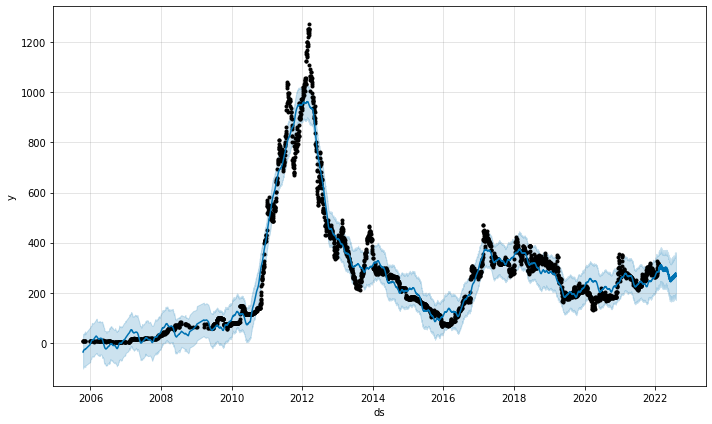

In [12]:
def make_forecast(ticker, periods, hist='max'):
    """
    forecast the given ticker (stock) period days into the future (from today)
    inputs
    ------
    > ticker
        >> ticker of stock to forecast
    > periods
        >> number of days into the future to forecast (from today's date)
    > hist
        >> amount of historical data to consider
            > default: max
            > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    """
    # pull historical data from yahoo finance
    stock_data = yf.Ticker(ticker)
    hist_data = stock_data.history(hist, auto_adjust=True)
    # create new dataframe to hold dates (ds) & adjusted closing prices (y)
    df = pd.DataFrame()
    df['ds'] = hist_data.index.values
    df['y'] = hist_data['Close'].values
    # create a Prophet model from that data
    m = Prophet(daily_seasonality=False)
    m.fit(df)
    future = m.make_future_dataframe(periods, freq='D')
    forecast = m.predict(future)
    m.plot(forecast)
    return forecast

#Fungsi menentukan bubble
make_forecast(stock, 180)

In [13]:
#Mencari Net Profit Margin dari data triwulan & tahunan
print("\n[NPM] Net Profit Margin Quarterly")
qinstat["Net Profit Margin (%)"] = qinstat["Earnings"] / qinstat["Revenue"] * 100 
print(qinstat.head())
print("\n[NPM] Net Profit Margin Annually")
instat["Net Profit Margin (%)"] = instat["Earnings"] / instat["Revenue"] * 100 
print(instat.head())


[NPM] Net Profit Margin Quarterly
          Revenue  Earnings  Net Profit Margin (%)
Quarter                                           
4Q2020   15089129    190309               1.261233
1Q2021   19935508   1971004               9.886901
2Q2021   27488086   1990795               7.242392
3Q2021   32721713   5277423              16.128199

[NPM] Net Profit Margin Annually
        Revenue  Earnings  Net Profit Margin (%)
Year                                            
2017   83764246  13637461              16.280766
2018   56942510    663474               1.165165
2019  114851737   5544652               4.827661
2020   72221596  -7322874             -10.139452


##Visualisasi cashflow statement

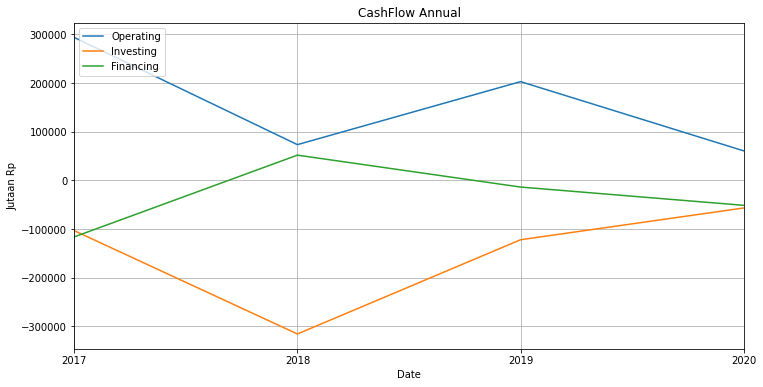

In [14]:
#change to cashflow finance
cfo_series = pd.Series(cfo, name='CFO')
cfi_series = pd.Series(cfi, name ='CFI')
cff_series = pd.Series(cff, name='CFF')
annualcf = pd.concat([cfo_series, cfi_series, cff_series], axis=1)

plt.figure(figsize=(12, 6))
cfo_series.plot(grid = True, label= "Operating") 
cfi_series.plot(grid= True, label= "Investing")
cff_series.plot(grid= True, label= "Financing")
plt.xlabel("Date")
plt.ylabel("Jutaan Rp")
plt.title("CashFlow Annual")
plt.legend(loc="upper left")

#3b. Analyzing Financial Statement

In [15]:
incomeq.head()

,Research Development,Effect Of Accounting Charges,Income Before Tax,Minority Interest,Net Income,Selling General Administrative,Gross Profit,Ebit,Operating Income,Other Operating Expenses,Interest Expense,Extraordinary Items,Non Recurring,Other Items,Income Tax Expense,Total Revenue,Total Operating Expenses,Cost Of Revenue,Total Other Income Expense Net,Discontinued Operations,Net Income From Continuing Ops,Net Income Applicable To Common Shares
,,,,,,,,,,,,,,,,,,,,,,
2021-09-30,None,None,7825586.0,509296.0,5277423.0,1296314.0,8638542.0,7342228.0,7342228.0,NaN,-127127.0,None,None,None,2437670.0,32721713.0,25379485.0,24083171.0,483358.0,None,5387916.0,5277423.0
2021-06-30,None,None,2948718.0,398803.0,1990795.0,1780054.0,4741748.0,2961694.0,2961694.0,NaN,-106582.0,None,None,None,915566.0,27488086.0,24526392.0,22746338.0,-12976.0,None,2033152.0,1990795.0
2021-03-31,None,None,2559828.0,356446.0,1971004.0,1625463.0,4276269.0,2650806.0,2650806.0,NaN,-131452.0,None,None,None,778381.0,19935508.0,17284702.0,15659239.0,-90978.0,None,1781447.0,1971004.0
2020-12-31,None,None,-1212078.0,546003.0,190309.0,1265844.0,2336451.0,-1563654.0,-1563654.0,1726808.0,-175192.0,None,None,None,-686834.0,15089129.0,16652783.0,12752678.0,351576.0,None,-525244.0,190309.0


##Income Statement

##Balance Sheet

In [15]:
qbc1.head()

,Capital Surplus,Total Liab,Total Stockholder Equity,Minority Interest,Other Current Liab,Total Assets,Common Stock,Other Current Assets,Retained Earnings,Other Liab,Good Will,Treasury Stock,Other Assets,Cash,Total Current Liabilities,Deferred Long Term Asset Charges,Short Long Term Debt,Other Stockholder Equity,Property Plant Equipment,Total Current Assets,Long Term Investments,Net Tangible Assets,Net Receivables,Long Term Debt,Inventory,Accounts Payable,Intangible Assets,Deferred Long Term Liab
,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-09-30,578353.0,28428035.0,90862439.0,509296.0,5564866.0,119799770.0,24039183.0,10852428.0,115564956.0,9260323.0,1271375.0,-49320053.0,41501103.0,19583852.0,14496496.0,1989226.0,403598.0,-38289792.0,33975543.0,42344899.0,706850.0,89591064.0,5019415.0,4671216.0,6889204.0,7589107.0,NaN,NaN
2021-06-30,578353.0,28585395.0,86449008.0,398803.0,1972535.0,115433206.0,24039183.0,9618918.0,112089808.0,9364961.0,1271375.0,-50258336.0,40115165.0,15191267.0,14537197.0,1974800.0,597898.0,-39228075.0,34027315.0,39390566.0,628682.0,85177530.0,6252190.0,4683237.0,8328191.0,9548073.0,103.0,NaN
2021-03-31,578353.0,27286895.0,83992427.0,356446.0,1998964.0,111635768.0,24039183.0,9747076.0,110099013.0,9223496.0,1271375.0,-50724122.0,39334913.0,8433848.0,13496535.0,1970334.0,1131825.0,-39693861.0,34228195.0,36179864.0,621036.0,82720667.0,9737917.0,4566864.0,8261023.0,8449708.0,385.0,661006.0
2020-12-31,578353.0,24437727.0,83704553.0,546003.0,3114482.0,108688283.0,24039183.0,13620102.0,108128009.0,9507509.0,1372508.0,-49040992.0,38087130.0,5261039.0,10844104.0,1997562.0,2073944.0,-38010731.0,35449838.0,33085205.0,692812.0,82331255.0,7874410.0,4086114.0,6329654.0,4697240.0,790.0,1394506.0


###Analize of Debt

,T.Liab,ST Debt,LT Debt,Total Debt,net debt,Equity
,,,,,,
2017-12-31,234814.5,2028.9,34663.8,36692.7,NaN,1234686.1
2018-12-31,436637.9,8180.9,90778.8,98959.7,NaN,1210034.1
2019-12-31,471116.0,26523.7,77891.8,104415.5,NaN,1307291.4
2020-12-31,349180.9,29633.8,58384.8,88018.6,12845.7,1196020.7
2021-03-31,NaN,NaN,NaN,NaN,NaN,NaN


###Debt Analize

,T.Debt/E(%),N.debt/E(%),Curr.Ratio
,,,
2020-12-31,7.36,1.07,3.05
2019-12-31,7.99,-1.45,2.17
2018-12-31,8.18,3.99,1.48
2017-12-31,2.97,-17.87,3.54


In [22]:
debtquant = pd.concat([TLEq_series, TDEq_series, COLq_series], axis=1)
debtquant.head()

,T.Debt/E(%),N.debt/E(%),Curr.Ratio
,,,
2021-09-30,5.59,-15.97,2.92
2021-06-30,6.11,-11.46,2.71
2021-03-31,6.78,-3.26,2.68
2020-12-31,7.36,1.07,3.05


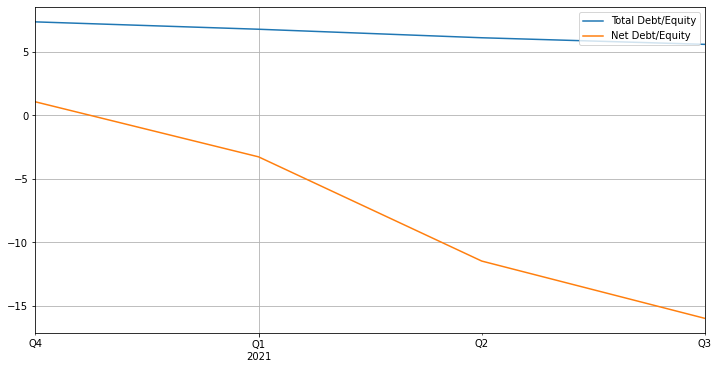

In [32]:
plt.figure(figsize=(12, 6))
TLEq_series.plot(grid= True, label="Total Debt/Equity")
TDEq_series.plot(grid= True, label="Net Debt/Equity")
plt.legend(loc= "upper right")

##Analisa Cashflow statement


#3c. The Owner Earnings

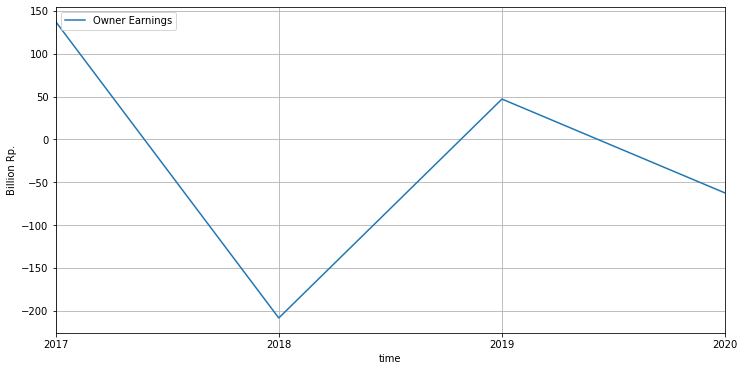

In [24]:

plt.figure(figsize=(12, 6))
ownearn.plot(grid = True, label="Owner Earnings") 
plt.ylabel("Billion Rp.")
plt.xlabel("time")
plt.legend(loc="upper left")


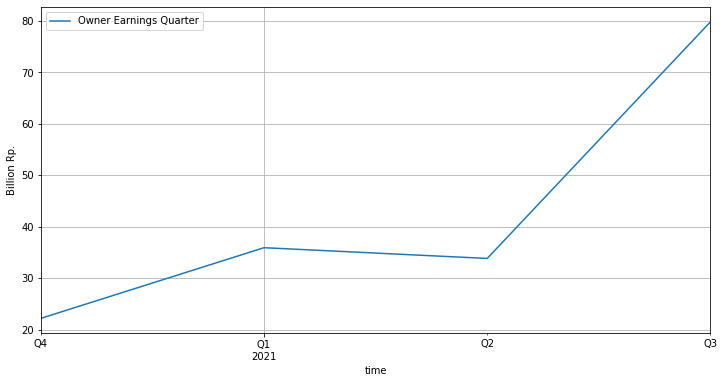

In [25]:
#quarter owner earnings
plt.figure(figsize=(12, 6))
ownearnq.plot(grid= True, label="Owner Earnings Quarter")
plt.ylabel("Billion Rp.")
plt.xlabel("time")
plt.legend(loc="upper left")